In [1]:
# importing packages and modules
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.optimize import minimize
from utils import *
from plotting_utils import *
from analysis_utils import *
import dglm_hmm1
from scipy.stats import multivariate_normal, norm
# import jax

# code from summer project working with PWM data
import sys, os
sys.path.append(os.path.abspath(os.path.join('..', '..', 'LC_PWM_GLM-HMM/code')))
import io_utils, analysis_utils, plotting_utils

sns.set_context("talk")

In [2]:
# list of animals that have good psychometrics
animalsIDs = ['W060','W068','W073','W074','W075','W080','W081','W082','W088','W089']

In [3]:
pni_path = '/Users/lencacuturela/Desktop/github/LC_PWM_GLM-HMM/data'
laptop_path = '/Users/lencacuturela/Desktop/Research/github/LC_PWM_GLM-HMM/data'

In [4]:
df = io_utils.load_and_wrangle(rat_id='W081', path=None, psychometric=True, cutoff=10, overwrite=False, stage_filter=3)
print(len(df.index.tolist()))
x, y = io_utils.prepare_design_matrices(rat_id='W081', path=None, psychometric=True, cutoff=10, stage_filter=3, overwrite=False)
sessInd = list(io_utils.session_start(rat_id='W081', path=None, psychometric=True, cutoff=10, stage_filter=3))
print(x.shape)
print(y.shape)
nfolds = 4
trainX, trainY, trainSessInd, testX, testY, testSessInd = split_data_per_session(x, y, sessInd, folds=nfolds, random_state=1)
print(trainX[0].shape)
print(testX[0].shape)
print(len(trainSessInd[0]))

104438
(104438, 6)
(104438,)
(78129, 6)
(26309, 6)
561


In [5]:
x, y = io_utils.prepare_design_matrices(rat_id='W081', path=None, psychometric=True, cutoff=10, stage_filter=3, overwrite=False)
sessInd = list(io_utils.session_start(rat_id='W081', path=None, psychometric=True, cutoff=10, stage_filter=3))
N = x.shape[0]
print(N)
C = 2 # classes
K = 1 # states
D = x.shape[1]
dGLM_HMM = dglm_hmm1.dGLM_HMM1(N,K,D,C)
initP, initW = dGLM_HMM.generate_param(sessInd=sessInd, transitionDistribution=['dirichlet', (5, 1)], weightDistribution=['uniform', (-2,2)]) # initialize the model parameters
checkP, checkW, checkLl = dGLM_HMM.fit(x, y,  initP, initW, sigma=reshapeSigma(10**4, K, D), sessInd=sessInd, pi0=None, maxIter=400, tol=1e-4) # fit the model
print(np.argmax(checkLl))

104438
0
[-1.89978883 -1.18280332  1.52579788  1.31519663 -1.19327193  1.35461541]
[ 1.74552862  1.62980427 -1.51522752 -1.10671665 -0.46602999 -0.02774673]
[ 1.36947054  0.41107917  1.87246406 -0.90350791 -1.30815274  1.48905991]
[ 1.34114087 -1.20342158 -1.53077711  0.98201188 -1.66434341  0.72426758]
[-1.52896922  0.27752752 -0.69822997  0.0235764   0.77735021 -1.67949785]
[ 0.60275984 -1.25676163  1.00595704 -1.54531542 -0.21535945  1.08381416]
[-1.55993008 -1.29221713 -0.45073715  0.46763868 -1.4145191  -0.85795966]
[ 0.99997204  1.21578162 -0.42648413  0.65369014 -1.71453326 -0.44844342]
[ 0.23440252 -0.84631606 -0.67099669 -0.7941528  -1.57382866  1.86760332]
[-1.83523922  0.18604874  1.4940792  -1.72028231 -1.69038435 -0.40293531]
[ 0.44691305  0.0019224  -0.82487372  0.58956853  0.1983187  -0.39881588]
[ 0.0567864  -1.36806113 -0.3330492  -0.19103777  1.11852002 -0.95541602]
[-0.97965432 -1.34988189 -0.20087481  0.11087592 -0.40020861  0.92686995]
[-0.90748448  1.69178074  0.2

In [8]:
rat_id = 'W081'
path = laptop_path
stage_filter=3
folds=5
x, y = io_utils.prepare_design_matrices(rat_id=rat_id, path=path, psychometric=True, cutoff=10, stage_filter=stage_filter, overwrite=False)
sessInd = list(io_utils.session_start(rat_id=rat_id, path=path, psychometric=True, cutoff=10, stage_filter=stage_filter)) 
trainX, trainY, trainSessInd, testX, testY, testSessInd = split_data_per_session(x, y, sessInd, folds=folds, random_state=1)
D = trainX[0].shape[1]
C = 2 # only looking at binomial classes

fold = 0
N = trainX[fold].shape[0]
oneSessInd = [0,N] # treating whole dataset as one session for normal GLM-HMM fitting
dGLM_HMM = dglm_hmm1.dGLM_HMM1(N,K,D,C)
trainY[fold] = trainY[fold].astype(int)
testY[fold] = testY[fold].astype(int)

initP, initW = dGLM_HMM.generate_param(sessInd=trainSessInd[fold], transitionDistribution=['dirichlet', (5, 1)], weightDistribution=['uniform', (-2,2)]) # initialize the model parameters
allP,  allW, trainLl = dGLM_HMM.fit(trainX[fold], trainY[fold],  initP, initW, sigma=reshapeSigma(10**5, K, D), sessInd=trainSessInd[fold], pi0=None, maxIter=400, tol=1e-3) # fit the model
                    

0
[ 1.65649317  0.97976197  0.38283247 -0.51937017 -0.91725565  0.84238321]
[ 0.99852983  0.41518575  1.70977716 -1.96161227 -0.30447362 -0.89728033]
[ 0.25594246  1.3501967   1.13462881  0.11711111  1.21351954 -0.57799155]
[ 0.26302033  1.79908773  0.26131887  0.0434139   0.6584616  -0.16312675]
[-0.70998403 -0.45269147  0.74457933 -0.24560585 -1.07063498  0.81664089]
[ 0.98728591  1.22897931 -1.39306599  0.52060284  1.66274624 -0.33579673]
[-0.63436114 -1.13839097 -0.84612494 -1.73373757  1.60008188 -0.37437864]
[ 1.69115829  1.91507084 -0.8661407  -1.82903089  1.15698571 -0.90593265]
[-0.26564809  1.23185455  0.03841311  0.23629418 -1.52427058  1.18179953]
[ 1.76490177  0.88666016 -0.96754441  1.72632396  0.76231743 -1.27409371]
[ 0.94265048 -1.85088741  1.89400636 -0.23643026  1.0742405   1.98325857]
[-0.18785435 -1.70237114  1.19897168  1.89724654 -1.31724601  0.13977838]
[ 1.39281449 -0.54913039  1.8021008   1.39767352 -0.07265495  1.41487237]
[ 0.4420936  -1.71871251 -0.10210544

### Fitting dGLM-HMM1 for PWM data with K=1,2 and multiple sigmas value

In [5]:
randomOrder = np.array([6, 1, 9, 4, 5, 0, 7, 8, 3, 2])
print(randomOrder) # [6 1 9 4 5 0 7 8 3 2]

[6 1 9 4 5 0 7 8 3 2]


In [7]:
sigmaList = [0] + [10**4] # + [10**x for x in list(np.arange(-3,1,0.5,dtype=float))] + [10**x for x in list(np.arange(1,5,1,dtype=float))] 
nfolds = 4

for randInd in randomOrder:
    animal = animalsIDs[randInd]
    print("Animal ", animal)
    for K in [2]:# [1,2]:
        trainLl, testLl, allP, allW = fit_eval_CV_multiple_sigmas_PWM(rat_id=animal, stage_filter=3, K=K, folds=nfolds, sigmaList = sigmaList, maxiter=300, path=laptop_path, save=True)

Animal  W081
Sigma Index 0
0
100
200
Sigma Index 1
0
[ 15.45863568 -25.78520459   5.29094284   3.72813607 -20.09633281
 -23.05083405]
[ 15.69492619 -17.73374514  -0.17243813   0.33863247 -15.0071491
 -15.90480488]
[ -4.44706454 -19.36110079  -2.21785228   0.16510747  -4.42753543
 -25.53038022]
[ -0.16514456 -11.02201487  -8.4494475   -0.11394831  -0.19542215
 -24.48058088]
[-19.775379   -10.05075807  -4.55336518 -13.21351248 -14.86213869
 -17.13744024]
[-19.41015199  -4.42307164  -7.77354245 -11.86247056 -12.29255455
 -21.02737597]
[ -7.02379321 -14.43923027  21.44663905   0.61125784  -0.36371118
 -16.33012402]
[  0.12830425  -9.13861914  17.48147048  -9.94045221  -3.30002246
 -13.73695894]
[ 34.1367813  -40.49064047  87.5069849   22.68109335 -29.99922925
 -31.29469997]
[ 27.99062315 -44.66260011 100.00237905  23.69277859 -35.17931427
 -22.71366746]
[ -8.28311564 -14.96798172  37.07235686 -20.87525247 -23.74280422
 -24.81533209]
[ -9.5319277  -12.92317452  39.94185567 -22.48611428 -24.

/Users/lencacuturela/Desktop/Research/github/Pillow_dGLM-HMM/code/dglm_hmm1.py:64: RuntimeWarning: overflow encountered in exp
  phi[:,k,c] = np.exp(-np.sum(w[:,k,:,c]*x,axis=1))
/Users/lencacuturela/Desktop/Research/github/Pillow_dGLM-HMM/code/dglm_hmm1.py:65: RuntimeWarning: invalid value encountered in true_divide
  phi[:,k,:]  = np.divide((phi[:,k,:]).T,np.sum(phi[:,k,:],axis=1)).T
/Users/lencacuturela/Desktop/Research/github/Pillow_dGLM-HMM/code/dglm_hmm1.py:487: RuntimeWarning: divide by zero encountered in log
  logPhi = np.log(phi) # natural log of observation probabilities


OverflowError: math range error

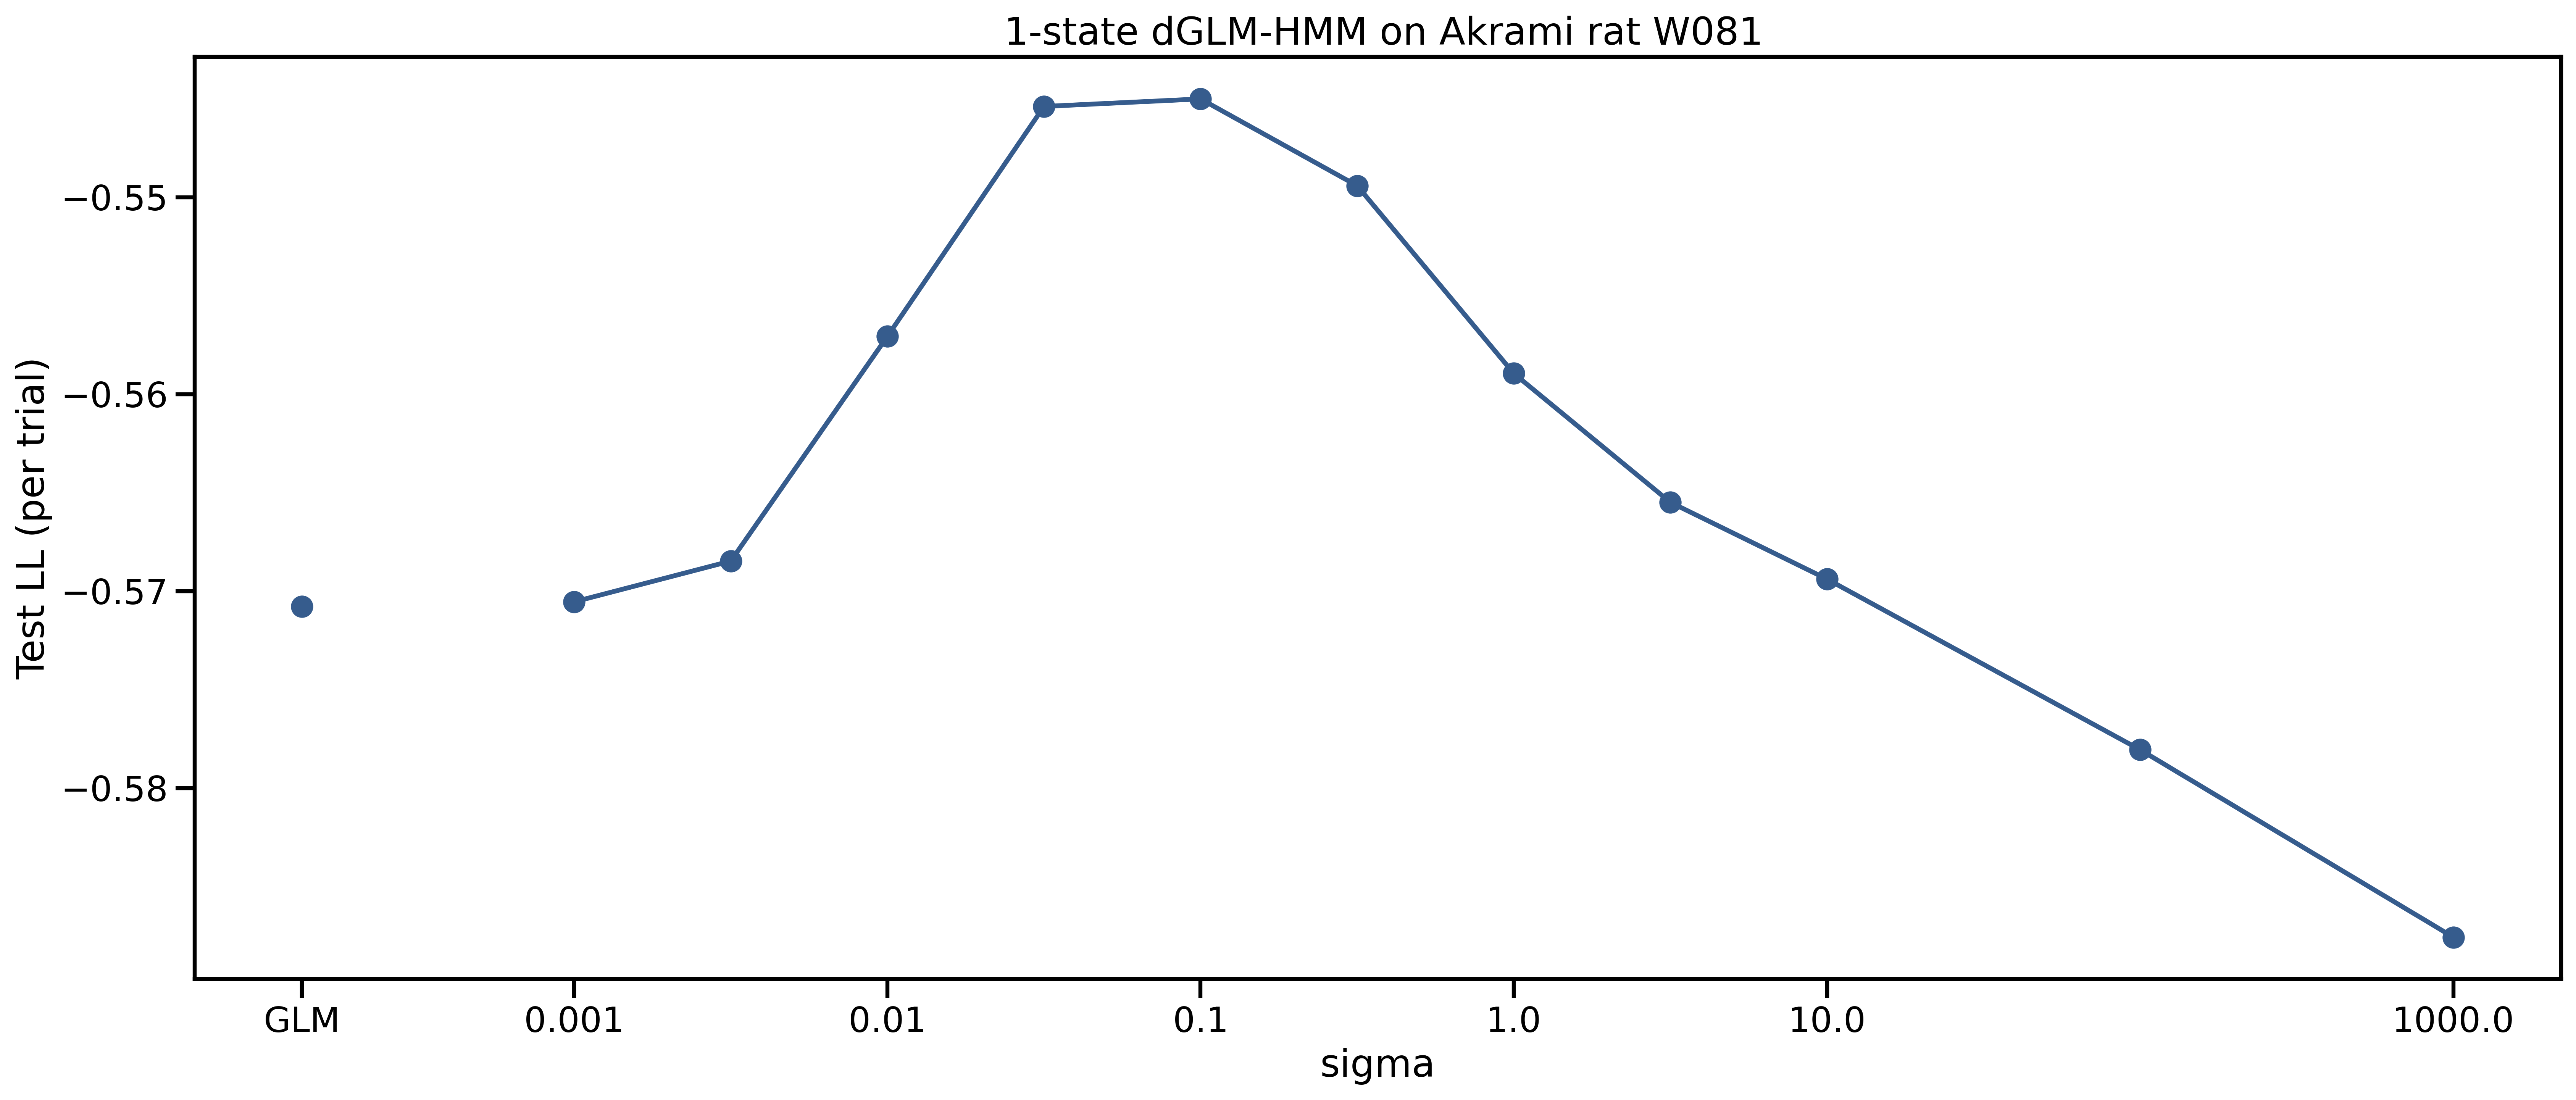

In [6]:
sigmaList = [0] + [10**x for x in list(np.arange(-3,1,0.5,dtype=float))] + [10**x for x in list(np.arange(1,4,1,dtype=float))] 
nfolds = 4
fig, axes = plt.subplots(1,figsize=(20,8), dpi=400)
sigma_CV_testLl_plot_PWM(rat_id='W081', stage_filter=3, K=1, folds=1, sigmaList=sigmaList, axes=axes, title=f' 1-state dGLM-HMM on Akrami rat W081', save_fig=True)